In [19]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ================== 1. Memuat dan Mengeksplorasi Data ==================

In [20]:

file_path = r'd:\Data Analyst\BANTU NGERTI\Belajar\dataset\penjualan_sepeda.csv'  

df = pd.read_csv(file_path)

df.head()


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [21]:
print('------Info Columns------ \n')
df.info()

------Info Columns------ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [22]:
# Cek missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64


In [23]:
# Imputasi untuk kolom kategorikal dengan modus
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Home Owner'] = df['Home Owner'].fillna(df['Home Owner'].mode()[0])

In [24]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Children'] = df['Children'].fillna(df['Children'].median())
df['Cars'] = df['Cars'].fillna(df['Cars'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())

In [25]:
print("Missing values setelah imputasi:")
print(df.isnull().sum())

Missing values setelah imputasi:
ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64


In [26]:
df['Gender'].value_counts()

Gender
Male      511
Female    489
Name: count, dtype: int64

In [27]:
df['Education'].value_counts()

Education
Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: count, dtype: int64

In [28]:
region = df['Region'].value_counts()
print('-----Info Region-----')
print(region)


-----Info Region-----
Region
North America    508
Europe           300
Pacific          192
Name: count, dtype: int64


In [29]:
occupation = df['Occupation'].value_counts().head(10)
print('-----Info Occupation-----')
print(occupation)

-----Info Occupation-----
Occupation
Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: count, dtype: int64


In [30]:
commute_distance = df['Commute Distance'].value_counts()
print('-----Info Commute Distance-----')
print(commute_distance)

-----Info Commute Distance-----
Commute Distance
0-1 Miles     366
5-10 Miles    192
1-2 Miles     169
2-5 Miles     162
10+ Miles     111
Name: count, dtype: int64


# ================== 2. Visualisasi Data ==================

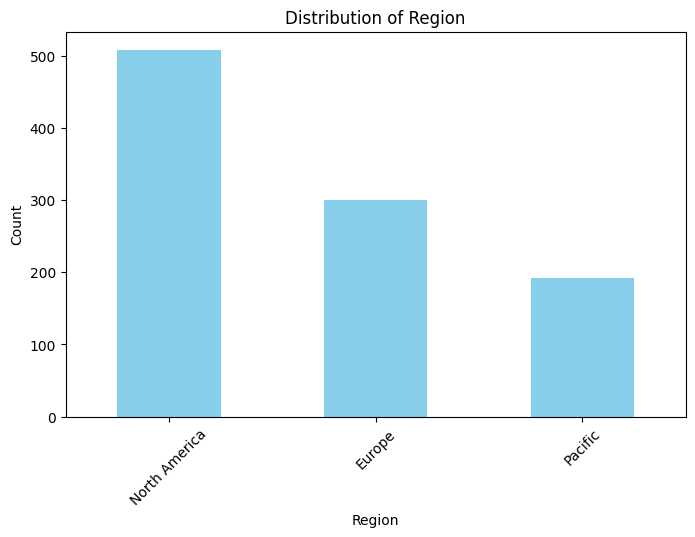

In [31]:
# Barplot untuk Region
plt.figure(figsize=(8, 5))
region.plot(kind='bar', color='skyblue')
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

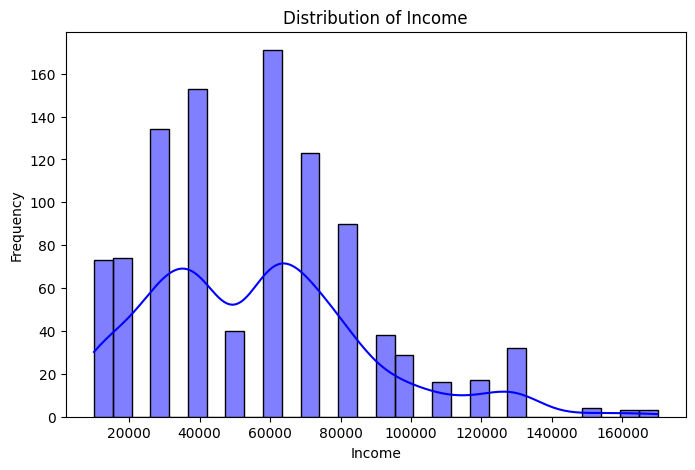

In [32]:
# Histogram untuk Income
plt.figure(figsize=(8, 5))
sns.histplot(df['Income'], kde=True, bins=30, color='blue')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

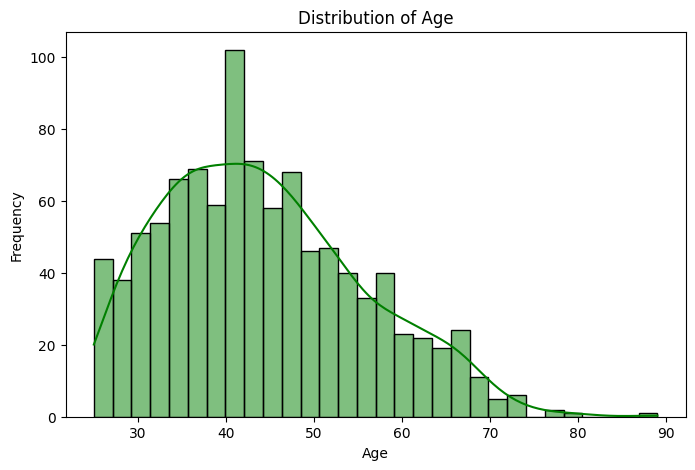

In [33]:
# Histogram untuk Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30, color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Baby Yoda\AppData\Local\Temp\ipykernel_9748\1916886888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased Bike', data=df, palette='viridis')


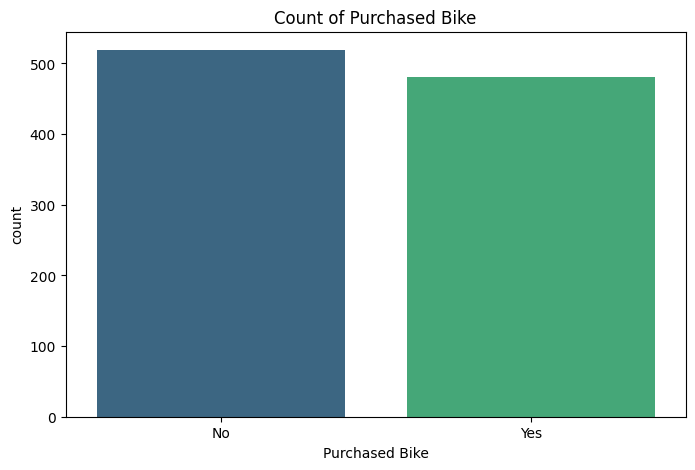

In [34]:
# Barplot untuk Purchased Bike
plt.figure(figsize=(8, 5))
sns.countplot(x='Purchased Bike', data=df, palette='viridis')
plt.title('Count of Purchased Bike')
plt.show()

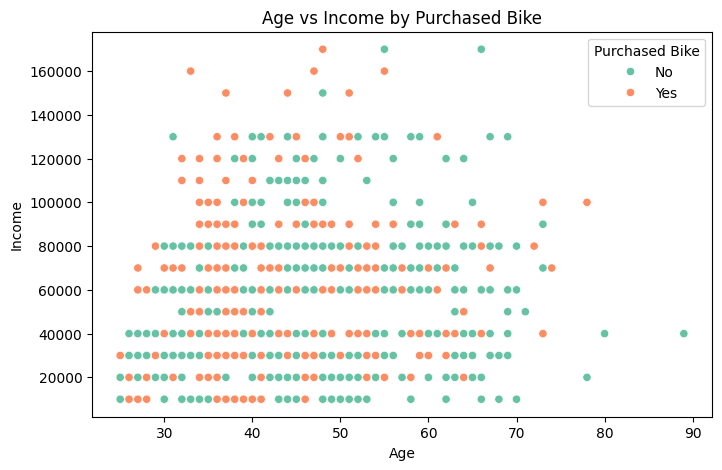

In [35]:
# Scatter plot untuk Age vs Income
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Income', hue='Purchased Bike', data=df, palette='Set2')
plt.title('Age vs Income by Purchased Bike')
plt.show()

C:\Users\Baby Yoda\AppData\Local\Temp\ipykernel_9748\3615458090.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Purchased Bike', y='Income', data=df, palette='Set2')


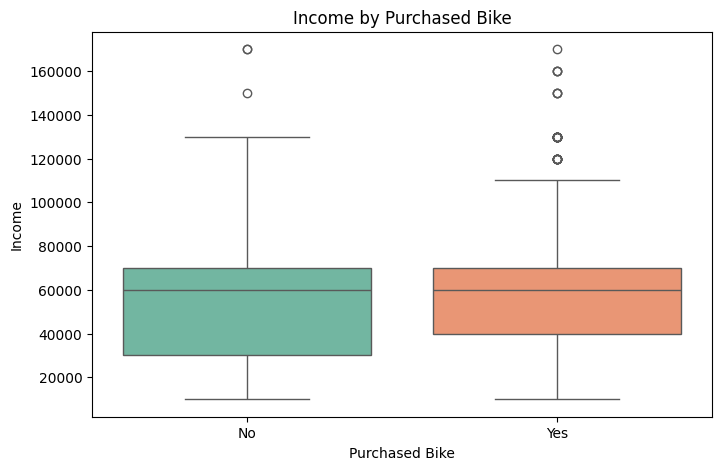

In [36]:
# Boxplot Income berdasarkan Purchased Bike
plt.figure(figsize=(8, 5))
sns.boxplot(x='Purchased Bike', y='Income', data=df, palette='Set2')
plt.title('Income by Purchased Bike')
plt.show()

In [37]:
# Crosstab untuk Marital Status vs Purchased Bike
crosstab = pd.crosstab(df['Marital Status'], df['Purchased Bike'])
print(crosstab)

Purchased Bike   No  Yes
Marital Status          
Married         308  234
Single          211  247


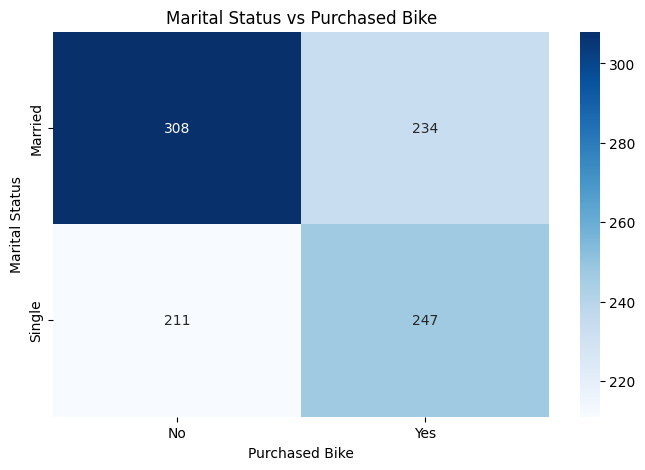

In [38]:
# Visualisasi heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Marital Status vs Purchased Bike')
plt.show()

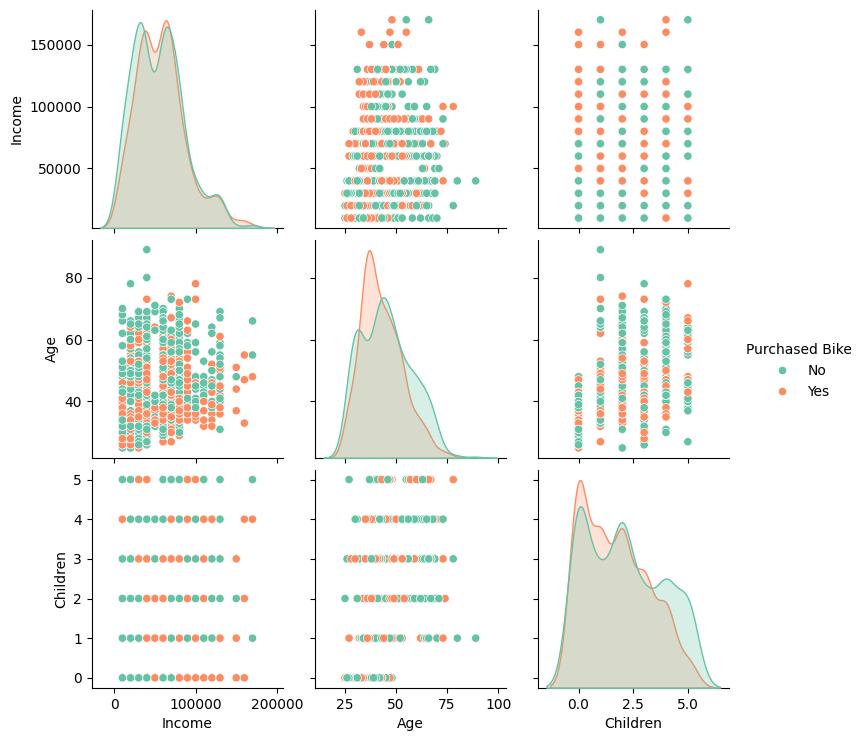

In [41]:
# Pairplot untuk variabel numerik
sns.pairplot(df, vars=['Income', 'Age', 'Children'], hue='Purchased Bike', palette='Set2')
plt.show()


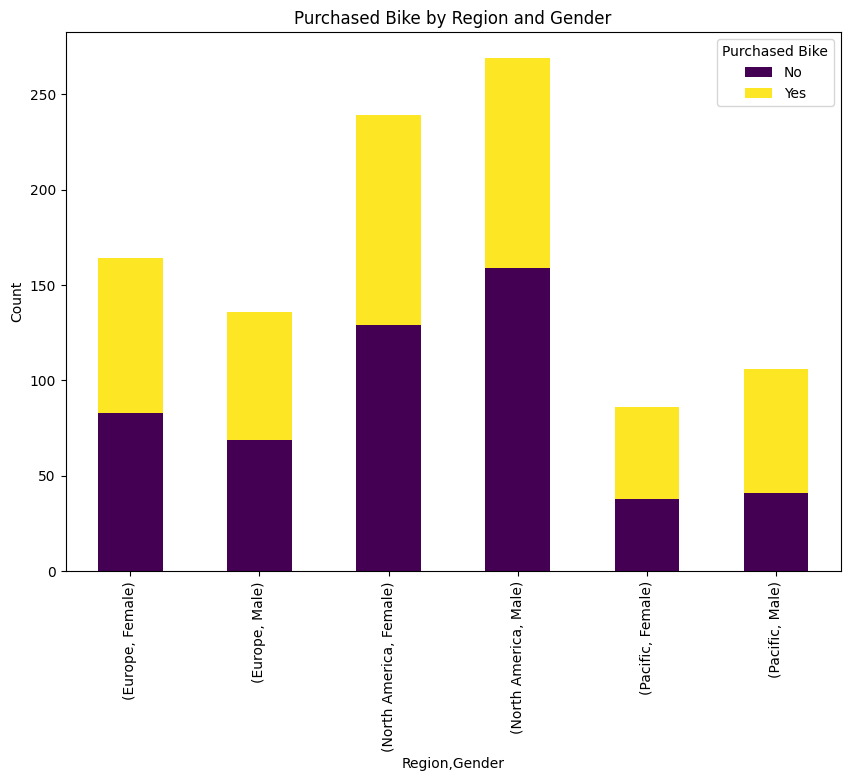

In [42]:
# Grouped bar chart: Purchased Bike berdasarkan Region dan Gender
grouped = df.groupby(['Region', 'Gender'])['Purchased Bike'].value_counts().unstack()
grouped.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.title('Purchased Bike by Region and Gender')
plt.ylabel('Count')
plt.show()

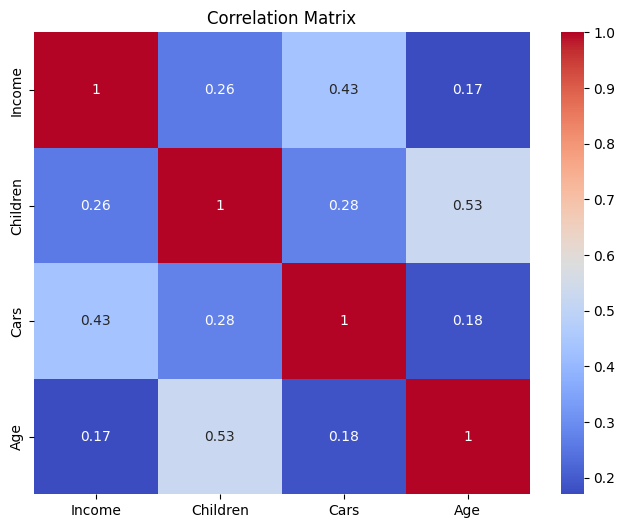

In [40]:
# Korelasi
correlation = df[['Income', 'Children', 'Cars', 'Age']].corr()

# Heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
